# One Sample T-test

<img src="img/07-03.png" width="800"/>

- 고양이들의 평균 몸무게가 2.6kg인지 아닌지 검증 하시오.
- Bwt : 고양이의 몸무게
- Hwt : 고양이의 길이

In [7]:
import pandas as pd
df = pd.read_csv('./data/cats.csv')
df.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


## 풀이

### 정규 분포 확인

In [10]:
# mu = 2.6, shapiro.test

from scipy.stats import stats
from scipy.stats import shapiro
mu = 2.6
shapiro(df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

- 첫번째 값(통계 검증치), 두번째 값(p-value)
- 유의 수준 보다 작음으로, '데이터가 정규분포를 따른다'는 귀무 가설을 기각

###  wilcoxon test
- 정규분포를 따르지 않음으로, wilcoxon test로 t-test진행

In [11]:
from scipy.stats import wilcoxon
wilcoxon(df.Bwt - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

- p-value가 0.05보다 작아, '고양이의 몸무게가 2.6kg'이다 라는 귀무 가설 기각
- 즉, 유의 수준 0.05 하에서 '고양이의 몸무게는 2.6kg'이다 라고 말할 수 없다.

### 시각화

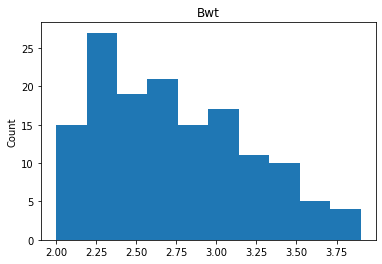

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['Bwt'])
plt.title('Bwt')
plt.ylabel('Count')
plt.show()

# Paired Sample t-test

<img src="img/07-06.png" width="800"/>

- 10명의 환자 대상, 수면영향제 복용 전후 수명시간 측정 하였다.
- 영양제의 효과 여부를 판단 하라.
- 표본이 정규성을 만족한고 가정 한다.

In [13]:
import pandas as pd
data = {'before':[7,3, 4, 5, 2, 1, 6, 6, 5, 4],
    'after':[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
df = pd.DataFrame(data)
df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


## 풀이
- 가설 수립
    - 귀무가설 : 수면제 복용 전과 후의 수면시간 차이가 없다.
    - 대립가설 : 수면제 복용 전과 후의 수면시간 차이가 있다.

### t-test

In [17]:
# alternative : {'two-sided', 'less', 'greater'}
stats.ttest_rel(df['after'], df['before'], alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

- p-value = 0.00052 으로 유의 수준 보다 작아 귀무 가설 기각
- 결론 '수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다' 

# Independent Sample t-test

<img src="img/07-09.png" width="800"/>


- 위의 cats 데이터로 정규성을 따른다는 가정 하에, 수컷과 암컷 고양이의 몸무게 차이가 있는지 비교하라

In [19]:
import pandas as pd

df = pd.read_csv('./data/cats.csv')
female = df.loc[df.Sex == 'F', 'Bwt']
male = df.loc[df.Sex == 'M', 'Bwt']

## 풀이

### 등분산성 검정

- 정규성을 만족한다는 가정 하에, cats 데이터의 등분산성 검정(levene-test) 진행

In [20]:
from scipy.stats import stats, levene

levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

- p-value가 유의수준 0.05 보다 작음으로
- 귀무가설(암컷과 수컷 고양이의 몸무게의 등분산성을 만족 한다) 을 기각.
- 즉, 암컷, 수컷 고양이의 몸무게는 등분산성을 만족하지 않는다. 
- t-test에서 equal_var = False 로 설정

### t-test

In [21]:
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

- p-value의 값이 유의수준 보다 작음으로 
- 귀무가설(수컷과 암컷의 몸무게 차이는 없다) 기각
- 즉, 수컷과 암컷 몸무게 차이가 존재 한다.

### 시각화

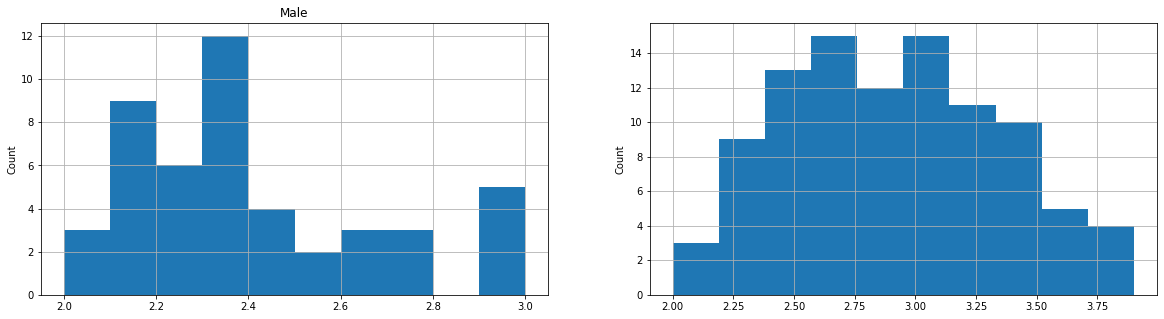

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
female.hist(ax=axes[0])
axes[0].set_title('Female')
axes[0].set_ylabel('Count')
male.hist(ax=axes[1])
axes[0].set_title('Male')
axes[1].set_ylabel('Count')
plt.show()

# Independent Sample t-test 2

- 1반과 2반의 성적은 다음과 같다.

In [42]:
x1 = [80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80]
x2 = [80, 85, 70, 80, 35, 55, 80]

- 1반의 성적 평균이 2반의 성적 평균 보다 좋다고 할 수 있는가?

## 풀이

### 등분산성 검정

In [43]:
from scipy.stats import stats, levene

levene(x1, x2)

LeveneResult(statistic=0.005908291157112759, pvalue=0.9396280207926151)

- 귀무가설(x1과 x2의 성적은 등분산성을 만족 한다) 을 기각하지 못함.

### t-test

- p-value > 0.05, 1반의 실력이 2반 보다 좋다고 이야기 할 수 없다.

In [44]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

# One-way ANOVA

<img src="img/07-14.png" width="800"/>

- iris dataset에서 Species 별로 꽃받침의 폭의 평균이 같은지, 차이가 있는지 일원배치 분산분석 시행 하라

In [24]:
import scipy.stats as stats
import pandas as pd 

df = pd.read_csv('./data/iris.csv')
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
df['target'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

## 풀이

### 가설

In [27]:
# target 별로 변수에 할당
targets = df['target'].unique()
setosa = df[df['target'] == targets[0]]['sepal width']
versicolor = df[df['target'] == targets[1]]['sepal width']
virginica = df[df['target'] == targets[2]]['sepal width']

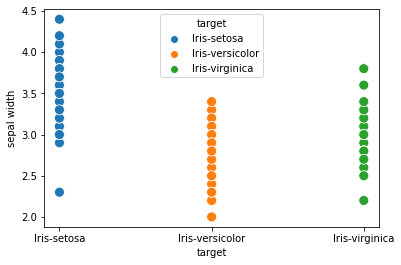

In [28]:
# target 별 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='target', y='sepal width', data=df, hue='target', s=100)
plt.show()

- 시각화 결과, 3 종류의 sepal width 의 평균은 차이가 있어 보인다.
- 다음과 같은 통계정 가설을 세운다
    - 귀무가설($H_0$) : 세 가지 종에 대해 sepal width의 평균은 모두 같다.
    - 대립가설($H_1$) : 적어도 하나의 종에 대한 sepal width의 평균값에는 차이가 있다.

### 정규성 확인

In [30]:
# 각 변수가 정규성을 따르는지 확인 한다.
# 모두 p-value > 0.05로 정규성을 만족 한다. 
# 따라서 등분산성을 확인한다. (만약 하나라도 만족 하지 못하면 kruskal 고려)
print('setosa : ',stats.shapiro(setosa))
print('versicolor : ',stats.shapiro(versicolor))
print('virginica : ',stats.shapiro(virginica))

setosa :  ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
versicolor :  ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
virginica :  ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


### 등분산성 검정
- 등분산성 검정의 
    - 귀무가설(H0)은 "집단의 분산이 같다"
    - 연구가설(H1)은 "집단의 분산이 다르다"

In [36]:
# p-value > 0.05 로, 등분산성을 만족 한다.
# 만약 등분산성을 만족 시키지 못했다면, welch_anova 분석을 시행
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

### ANOVA
- p-value < 0.05, 귀무가설 기각
- 적어도 하나의 종에 대한 sepal width의 평균값에는 차이가 있다.

In [37]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

# Two-way ANOVA
- 변수 3개(하나는 범주형/ 나머지 두개는 수치형 연속 변수)의 이원분산분석을 수행하고 통계표를 작성 하시오.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/avocado.csv')
df = df[['AveragePrice', 'type', 'region']]
df = df[(df['region'] == 'Orlando')|(df['region'] == 'Boston')|(df['region'] == 'Chicago')].reset_index(drop=True)
df

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


## 풀이

### 가설
- 귀무가설1: region과 type 간에는 교호작용 효과가 없다. (교호작용 interaction이란 독립변수 사이에 상호작용이 있어서, 두 효과의 합이 산술적인 예상치보다 차이가 나는 것을 말한다.)
- 대립가설1: region과 type 간에는 교호작용 효과가 있다.
- 귀무가설2: region에 따른 AveragePrice 차이는 존재하지 않는다.
- 대립가설2: region에 따른 AveragePrice 차이는 존재 한다.
- 귀무가설3: type에 따른 AveragePrice 차이는 존재하지 않는다.
- 대립가설3: type에 따른 AveragePrice 차이는 존재한다.

In [2]:
# 독립변수 type. region, 종속변수 AveragePrice를 별도의 객체에 저장
avocado_type = df['type']
region = df['region']
AveragePrice = df['AveragePrice']

### ANOVA

In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~ C(avocado_type)*C(region)'
model = ols(formula, df).fit()
avo_table = anova_lm(model, typ=2)
avo_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


- 교호작용에 대한 검정 결과는, C(avocado_type):C(region) 행의 p-value를 보고 판단
- 1.146622e-06 로 0.05 이하, 귀무가설 기각, 따라서, 교호작용이 있다고 할 수 있다.
- C(avocado_type)과 C(region)의 AveragePrice에 대한 효과는, p-value가 0.05 이하
- 각 변수의 종류에 따른 AveragePrice에 차이가 있다고 할 수 있다.

### 시각화

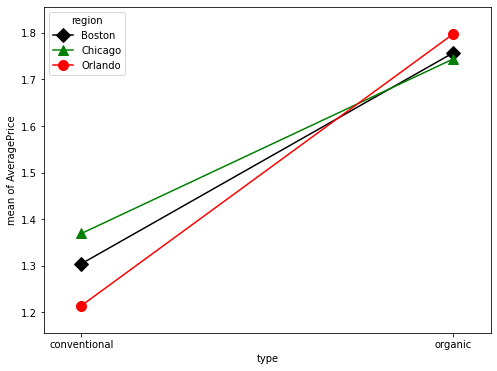

In [4]:
# 더 직관적인 판단을 위한 시각화
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
fig = interaction_plot(avocado_type, region, AveragePrice, colors=['black', 'green', 'red'], markers=['D', '^', 'o'], ms=10, ax=ax)
plt.show()

# 카이제곱 검정 - 적합성 검정
- titanic data의 생존자 중 남녀 비율이 같은지, 가설을 세우고 검정 하시요.

## 풀이
### 가설
    - 귀무가설 : 타이타닉호의 생존자 중 남성 비율이 50%, 여성 비율이 50% 이다.
    - 대립가설 : 타이타닉호의 생존자 중 남성의 비율이 50%, 여자의 비율이 50%라고 할 수 없다.

In [8]:
import pandas as pd
df = pd.read_csv('./data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [9]:
# 생존자만 골라 냄 
df = df[df['survived']==1]
table = df['sex'].value_counts()
table

female    233
male      109
Name: sex, dtype: int64

### 적합성 검정

- 교차 분석을 사용하기 위해, 명목형 변수 sex 변수에 대한 도수분포표를 생성
- 범주별 관찰빈도를 확인 후 적합도 검정

In [10]:
# 유의수준 0.05로 적합도 검정 수행
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171, 171])
print(f'적합도 검정 : {chi}')

적합도 검정 : Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


- 카이제곱 통계량 : 44.95, p-value : 2.0119672574477235e-11
- 귀무가설 기각, 즉 유의수준 0.05에서 타이타닉호의 생존자 남녀 비율은 50:50 이라고 할 수 없다.

# 카이제곱 검정 - 독립성 검정
- titanic 데이터의 좌석 등급(class)과 생존여부(survived)가 서로 독립인가 검정 하세요.

## 풀이
### 가설
    - 귀무가설 : class 변수와 survived 변수는 독립이다.
    - 대립가설 : class 변수와 survived 변수는 독립이 아니다.

In [11]:
import pandas as pd
df = pd.read_csv('./data/titanic.csv')
table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


### 독립성 검정

In [12]:
# 카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(table)
print(f'Statistic : {chi}')
print(f'p-value : {p}')
print(f'df : {df}')
print(f'Expect : {expect}')

Statistic : 102.88898875696056
p-value : 4.549251711298793e-23
df : 2
Expect : [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


- p-value < 0.05, 귀무가설 기각
- 즉, 좌석 등급과 생존은 유의수준 0.05하에서 독립이라고 할 수 없다.